# Case 3.2

## Business Problem

We are interested in understanding the behaviour and dynamics of TESLA (TSLA) stock. This information was downloaded from [Yahoo Finance](https://finance.yahoo.com/quote/TSLA/history?p=TSLA) after the closing time of september 22 of 2021

## Packages Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Import

In [2]:
data_tesla = pd.read_csv('/work/indu5000_case_3.2/Data/TSLA.csv',sep=',') 

In [3]:
type(data_tesla)

pandas.core.frame.DataFrame

In [4]:
data_tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-23,405.160004,412.149994,375.880005,380.359985,380.359985,95074200
1,2020-09-24,363.799988,399.500000,351.299988,387.790009,387.790009,96561100
2,2020-09-25,393.470001,408.730011,391.299988,407.339996,407.339996,67208500
3,2020-09-28,424.619995,428.079987,415.549988,421.200012,421.200012,49719600
4,2020-09-29,416.000000,428.500000,411.600006,419.070007,419.070007,50219300


## Exploratory Data Analysis (EDA)

Before we can start to do any kind of analysis, we must understand the data we are working with. So an exploratory data analysis must be performed on the data

### Question 1

How many columns do we have, what kind of information is contained on those and what does it mean for the business problem?

In [5]:
data_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


### Question 2

In [6]:
data_tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,645.609113,658.328174,631.449643,645.713054,645.713054,3.296866e+07
std,122.492349,123.818660,120.687675,122.609278,122.609278,1.948111e+07
min,363.799988,399.500000,351.299988,380.359985,380.359985,9.800600e+06
25%,600.222489,611.342484,581.822495,598.974991,598.974991,2.140210e+07
50%,666.915008,680.994995,650.649994,663.614990,663.614990,2.897340e+07
75%,716.354996,727.680007,704.440018,715.264999,715.264999,3.960535e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,2.221262e+08


### Question 3

What macro trends can you observe on the data?

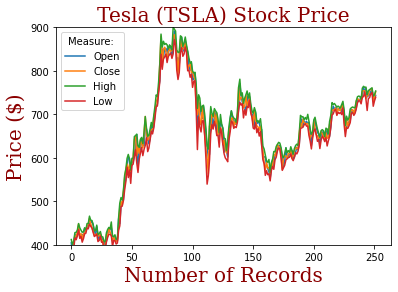

In [27]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size':20,
        }

plt.plot(data_tesla['Open'],label='Open')
plt.plot(data_tesla['Close'],label='Close')
plt.plot(data_tesla['High'],label='High')
plt.plot(data_tesla['Low'],label='Low')
#plt.xlim(left = 0, right=250)
plt.ylim(top = 900, bottom=400)
plt.title('Tesla (TSLA) Stock Price', fontdict=font)
plt.xlabel('Number of Records', fontdict=font)
plt.ylabel('Price ($)', fontdict=font)
plt.legend(title='Measure: ')


## Extract, Transform and Load (ETL)

## Data Augmentation

As only the recorded information is provided, it would be useful to add information about several calculated features

### Question 4

Calculate the average price of the stock during the day

In [36]:
data_tesla['High']

0      412.149994
1      399.500000
2      408.730011
3      428.079987
4      428.500000
          ...    
247    758.909973
248    761.039978
249    742.000000
250    744.739990
251    753.669922
Name: High, Length: 252, dtype: float64

In [8]:
data_tesla['Average Price'] = (data_tesla['High'] + data_tesla['Low'])/2

In [9]:
data_tesla[['Average Price']].describe()

,Average Price
count,252.000000
mean,644.888908
std,122.043597
min,375.399994
25%,593.616249
50%,665.985001
75%,716.363747
max,883.750000


### Question 5

Calculate the absolute value of the price variation over the day

In [10]:
data_tesla['Range of Variation'] = abs(data_tesla['High']- data_tesla['Low'])

In [11]:
data_tesla['Range of Variation'].describe()

count    252.000000
mean      26.878530
std       14.648995
min        8.120025
25%       16.037491
50%       23.869994
75%       32.795029
max       94.609985
Name: Range of Variation, dtype: float64

### Question 6

It can also be added an indicator that shows if the stock has had a net positive (1) or negative (0) change over the day

In [12]:
# First, we need to calculate the change on the net variation over the day
data_tesla['Net Variation over day']= data_tesla['Close'] - data_tesla['Open']
# Then, a function is created to indicate the variation

def indicate_variation(x):
    if x > 0:
        return 1
    else:
        return 0

data_tesla['Indicator Net Variation'] = data_tesla['Net Variation over day'].apply(lambda x: indicate_variation(x))
data_tesla[['Indicator Net Variation','Net Variation over day']].head()

,Indicator Net Variation,Net Variation over day
0,0,-24.800019
1,1,23.990021
2,1,13.869995
3,0,-3.419983
4,1,3.070007


## Data Transformation

But, there is still a problem, Python is not able to understand correctly the dates and some categories.

### Question 7

Format the dates correctly, so the program can understand it correctly

In [13]:
print(type(data_tesla['Date'][0]))

<class 'str'>


In [14]:
data_tesla['Date'] = pd.to_datetime(data_tesla['Date'])
data_tesla['Date'].head()

0   2020-09-23
1   2020-09-24
2   2020-09-25
3   2020-09-28
4   2020-09-29
Name: Date, dtype: datetime64[ns]

In [15]:
print(type(data_tesla['Date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


### Question 8

Set the variable "Indicator Variation" as a categorical variable so python can understand that the number describes a category

In [16]:
data_tesla['Indicator Net Variation'] = data_tesla['Indicator Net Variation'].astype('category')
data_tesla['Indicator Net Variation'].head()

0    0
1    1
2    1
3    0
4    1
Name: Indicator Net Variation, dtype: category
Categories (2, int64): [0, 1]

In [17]:
data_tesla['Indicator Net Variation'].cat.categories

Int64Index([0, 1], dtype='int64')

## Data Visualization

### Question 9

Generate a visualization of average stock price over time

Text(0, 0.5, 'Price ($)')

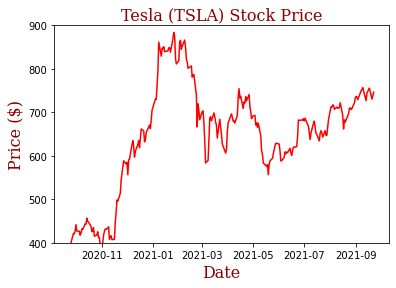

In [18]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.plot(data_tesla['Date'],data_tesla['Average Price'],'r')
plt.ylim(top = 900, bottom=400)
plt.title('Tesla (TSLA) Stock Price', fontdict=font)
plt.xlabel('Date', fontdict=font)
plt.ylabel('Price ($)', fontdict=font)

### Question 10

We can also understand the distribution of the variaton of price,the net variation over the day and the whole variation over the day

Text(0, 0.5, 'Count')

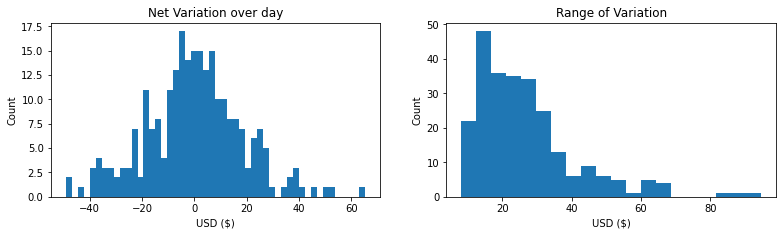

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 3.2));
ax1.hist(data_tesla['Net Variation over day'],bins=50);
ax1.set_title('Net Variation over day');
ax1.set_xlabel('USD ($)')
ax1.set_ylabel('Count')
ax2.hist(data_tesla['Range of Variation'],bins=20);
ax2.set_title('Range of Variation');
ax2.set_xlabel('USD ($)')
ax2.set_ylabel('Count')


### Question 11

Over the recorded. history, how many times, has the stock had a net increase or decrease over the day?

In [20]:
data_tesla_net_movement = data_tesla[['Date','Indicator Net Variation']].groupby(by='Indicator Net Variation').count()
data_tesla_net_movement

,Date
Indicator Net Variation,
0,127
1,125


In [21]:
data_tesla_net_movement = data_tesla_net_movement.rename(columns={'Date':'Amount'})
data_tesla_net_movement

,Amount
Indicator Net Variation,
0,127
1,125


### Question 12

What is the probability of the stock going up?

In [22]:
Total_amount_of_records = data_tesla_net_movement['Amount'].sum()
Total_amount_of_records

252

In [40]:
Probability_of_going_up = round(data_tesla_net_movement['Amount'][1]/Total_amount_of_records,3)
print('Probability of going up:',Probability_of_going_up)

Probability of going up: 0.496


### Question 13

What difference can be seen on the opening price of the stock between the days that it goes up or down

<AxesSubplot:xlabel='Indicator Net Variation', ylabel='Open'>

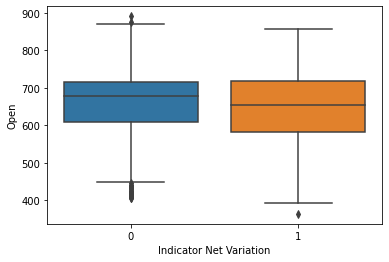

In [24]:
sns.boxplot(x=data_tesla['Indicator Net Variation'],y=data_tesla['Open'])

<AxesSubplot:xlabel='Indicator Net Variation', ylabel='Open'>

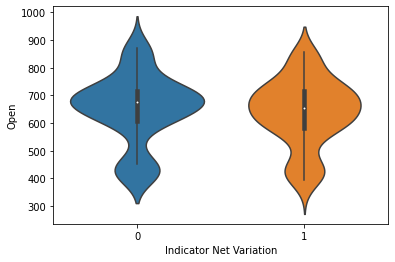

In [25]:
sns.violinplot(x=data_tesla['Indicator Net Variation'],y=data_tesla['Open'])

### Question 14

How many days had a range of change of price greater than 20 USD

In [26]:
data_tesla_B = data_tesla[data_tesla['Range of Variation']>20].count()
data_tesla_B['Range of Variation']

157

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c3e4079d-b65d-4f98-a9c4-e84568c199f2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>